# show_sns_palettes
1. Seaborn

In [1]:
# Standard Libs
import random
import datetime
from typing import Union, Optional, Any, Literal, Sequence, TypeAlias

# Third-party Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Custom types for non-included typing annotations
IndexElement: TypeAlias = Union[str, int, float, pd.Timestamp]

In [2]:
def to_series(
    data: Union[pd.Series, np.ndarray, dict, list, set, pd.DataFrame],
    index: Optional[Union[pd.Index, Sequence[IndexElement]]] = None,
    name: Optional[str] = None
) -> pd.Series:
    """
    Converts input data into a pandas Series with optional custom index and name.

    This function standardizes various data types into a pandas Series. It supports
    arrays, dictionaries, lists, sets, DataFrames, and existing Series. Optionally,
    a custom index or series name can be assigned.

    Parameters:
        data (Union[pd.Series, np.ndarray, dict, list, set, pd.DataFrame]):
            Input data to convert. Supported types:
            - pd.Series: returned as-is (can be overridden with new index/name).
            - np.ndarray: flattened and converted to a Series.
            - dict: keys become the index, values become the data.
            - list or set: converted to a Series with default integer index.
            - pd.DataFrame:
                - 1 column: converted directly to a Series.
                - 2 columns: first column becomes the index, second becomes the values.
        index (Union[pd.Index, Sequence], optional): Custom index to assign to the Series.
            If provided, overrides the original index. Default is None.
        name (str, optional): Name to assign to the Series. Default is None.

    Returns:
        pd.Series: A pandas Series constructed from the input data, with optional
            custom index and name.

    Raises:
        TypeError: If the input data type is not supported.
        ValueError: If the DataFrame has more than 2 columns.

    Examples:
        >>> import pandas as pd
        >>> to_series([1, 2, 3, 4])
        0    1
        1    2
        2    3
        3    4
        dtype: int64

        >>> to_series({'A': 10, 'B': 20, 'C': 30})
        A    10
        B    20
        C    30
        dtype: int64

        >>> df = pd.DataFrame({'Label': ['X', 'Y'], 'Value': [100, 200]})
        >>> to_series(df)
        Label
        X    100
        Y    200
        Name: Value, dtype: int64

        >>> to_series([10, 20, 30], index=['a', 'b', 'c'], name='Measurements')
        a    10
        b    20
        c    30
        Name: Measurements, dtype: int64
    """
    
    # Validate parameters - FUTURE
    
    if isinstance(data, pd.Series):                 # If series is already a Series no conversion needed
        series = data                                  
    elif isinstance(data, np.ndarray):              # If data is a NumPy array   
        series = pd.Series(data.flatten())
    elif isinstance(data, (dict, list)):
        series = pd.Series(data)
    elif isinstance(data, (set)):
        series = pd.Series(list(data))
    elif isinstance(data, pd.DataFrame):
        if data.shape[1] == 1:                      # Also len(data.columns == 1)
            series = data.iloc[:, 0]
        elif data.shape[1] == 2:                    # Index: first col, Data: 2nd Col
            series = data.set_index(data.columns[0])[data.columns[1]]
        else:
            raise ValueError("DataFrame must have 1 oer 2 columns. Categories and values for 2 columns cases.")
    else:
        raise TypeError(f"Unsupported data type: {type(data)}. "
                    "Supported types: pd.Series, np.ndarray, pd.DataFrame, dict, list, set, and pd.DataFrame")

    if name:
        series.name = name

    if index:
        series.index = index

    return series

In [3]:
def get_colorblind_palette_list():
    """
    Retorna una lista de colores (hexadecimales) amigables para personas
    con daltonismo, equivalentes a sns.color_palette('colorblind').
    """
    return [
        '#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC',
        '#CA9161', '#FBAFE4', '#949494', '#ECE133', '#56B4E9',
        '#5D8C3B', '#A93967', '#888888', '#FFC107', '#7C9680',
        '#E377C2', '#BCBD22', '#AEC7E8', '#FFBB78', '#98DF8A',
        '#FF9896', '#C5B0D5', '#C49C94', '#F7B6D2', '#DBDB8D',
        '#9EDAE5', '#D68E3A', '#A65898', '#B2707D', '#8E6C87'
    ]


def get_colors_list(palette: str, n_items: Optional[int] = 10) -> list[str]:
    """
    Return a valid matplotlib palette list 
    - 'colorblind' is a kind of sns.colorblind 
    - Quali (Cat) = ['tab10', 'tab20', 'Set1', 'Set2', 'Set3', 'Pastel1', 'Pastel2', 'Dark2', 'Paired', 'Accent', 'colorblind']
    - Sequen (Order) = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds']
    - Diverg (MidPoint) = ['coolwarm', 'bwr', 'seismic', 'PiYG', 'PRGn', 'BrBG', 'RdGy', 'RdBu', 'Spectral', 'RdYlGn', 'PuOr', 'RdYlBu']
    - Cyclic (Repeat)= ['twilight', 'twilight_shifted', 'hsv', 'turbo', 'cubehelix', 'gist_rainbow', 'jet', 'nipy_spectral', 'rainbow_r']
    - Mix = ['rainbow', 'flag', 'prism', 'ocean', 'terrain', 'gnuplot', 'CMRmap', 'hot', 'afmhot', 'gist_heat', 'copper', 'bone', 'pink']
    """
    if palette == 'colorblind':
        color_list = get_colorblind_palette_list()
    else:
        cmap = plt.get_cmap(palette, n_items)             # Use palette colormap
        color_list = [cmap(i) for i in range(n_items)]    # Get colors from the colormap

    return color_list

In [4]:
# cmap_1 = plt.get_cmap('colorblind', 3)
# colors: list = [cmap_1(i) for i in range(3)]

# # print(colors)
# colors


In [8]:
def show_sns_palettes(
    palette_group: Union[str, list[str]] = 'Sample',
    n_items: Optional[int] = 14,
) -> plt.Figure:
    """
    Displays a visual comparison of Seaborn color palettes in a two-column layout.

    This function creates a grid of bar charts, each showing the color progression of a
    specific Seaborn (or Matplotlib-compatible) colormap. It supports built-in palette groups
    (Qualitative, Sequential, Diverging, Cyclic), a default 'Sample' view, and custom lists of palettes.

    Parameters:
        palette_group (Union[str, list[str]]): Specifies which palettes to display:
            - If str: one of 'Qualitative', 'Sequential', 'Diverging', 'Cyclic', or 'Sample'.
              Case-insensitive; will be capitalized.
            - If list: a custom list of colormap names to display.
            - Default is 'Sample', which shows a representative selection from all groups.
        n_items (int, optional): Number of color swatches (bars) to display per palette.
            Must be between 1 and 25 (inclusive). Default is 16.

    Returns:
        matplotlib.figure.Figure: The generated figure object containing all subplots.
            This allows further customization, saving, or inspection after display.

    Raises:
        TypeError: If `palette_group` is not a string or list of strings, or if `n_items`
            is not a number.
        ValueError: If `n_items` is not in the valid range (1–25).

    Notes:
        - Invalid or deprecated colormap names are handled gracefully and labeled accordingly.
        - The layout adapts to the number of palettes, using two columns for better readability.
        - Uses `seaborn.color_palette` internally for color extraction and `matplotlib.axes.Axes.barh`
          for display.
        - Ideal for exploring and selecting appropriate color schemes for data visualization.

    Example:
        >>> show_sns_palettes('Sequential', n_items=10)
        # Displays 10-color samples for all Sequential palettes.

        >>> show_sns_palettes(['viridis', 'plasma', 'coolwarm', 'rainbow'], n_items=12)
        # Shows a custom comparison of four specific palettes.

        >>> show_sns_palettes()
        # Shows a default sample of 4 palettes from each category.
    """

    # Verified n_items parameter
    if not isinstance(n_items, (int, float)):
        raise TypeError(f"'n_items' parameter not valid. Must be an int or float. Got '{type(n_items)}'.")

    if n_items < 1 or n_items > 25:
        raise ValueError(f"'n_items' parameter not valid. Must be > 1 and < 26. Got '{n_items}'.")
    n_colors = int(n_items) # Use n_colors internally for consistency with seaborn

    # Palette_group selection + custom palette_group and palette_group parameter validation
    Custom = []                                     # Default empty list for custom palettes
    if isinstance(palette_group, str):
        palette_group_key = palette_group.strip().capitalize()
    elif isinstance(palette_group, list):
        # Convert all custom palette names to strings just in case
        Custom = [str(p) for p in palette_group]
        palette_group_key = 'Custom'
    else:
        raise TypeError(f"'palette_group' parameter not valid. Must be a string or a list. Got {type(palette_group)}.")

    # 1. Native palette Group lists (Seaborn often uses these names directly)
    Qualitative = ['Accent', 'bright', 'colorblind', 'dark', 'Dark2', 'Dark2_r', 'deep', 'flag',
                   'muted', 'Paired', 'Pastel1', 'Pastel2', 'prism', 'Set1', 'Set2', 'Set3',
                   'tab10', 'tab20', 'tab20b', 'tab20c']        # deep, muted, bright, pastel, dark, colorblind

    Sequential = ['autumn', 'binary', 'Blues', 'brg', 'BuPu', 'cividis', 'cool', 'crest',
                  'flare', 'GnBu', 'Greens', 'Greys', 'Greys_r', 'gnuplot', 'inferno', 'magma',
                  'mako', 'ocean', 'Oranges', 'OrRd', 'plasma', 'PuRd', 'Purples', 'Reds',
                  'rocket', 'terrain', 'viridis', 'Wistia']     # rocket, mako, flare, crest

    Diverging = ['BrBG', 'bwr', 'bwr_r', 'coolwarm', 'icefire', 'PiYG', 'PiYG_r', 'PRGn',
                 'PRGn_r', 'PuOr', 'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'seismic', 'Spectral',
                 'Spectral_r', 'vlag']                          # vlag, icefire

    Cyclic = ['berlin', 'cubehelix', 'cubehelix_r', 'flag_r', 'gist_rainbow', 'hsv', 'jet_r', 'managua',
              'nipy_spectral', 'rainbow', 'rainbow_r', 'twilight', 'twilight_shifted', 'turbo', 'vanimo',
              'twilight_r', 'twilight_shifted_r', 'turbo_r']

    # 2. Get the palette group (and _desc) based on the input string (the one selected by the user)
    palette_group_dic = {
        'Qualitative': (Qualitative, 'for categorical data'),
        'Sequential': (Sequential, 'for data that has an order'),
        'Diverging': (Diverging, 'for data that have a significant midpoint'),
        'Cyclic': (Cyclic, 'for data that repeats, such as angles or phases'),
        'Custom': (Custom, 'user selected palettes'),
    }

    defaults_for_sample = ('Sample', 'a sample of four from each category')
    # Get the list of palettes for the selected group and its description
    selected_palettes, palette_group_desc = palette_group_dic.get(palette_group_key, defaults_for_sample)

    # Adjust the palette_group for the 'Sample' (four from each group) case.
    # Any value different from the main groups
    if palette_group_key not in ('Qualitative', 'Sequential', 'Diverging', 'Cyclic', 'Custom'):
        palette_group_key = 'Sample'
        # Ensure k is not greater than list length for random.sample
        k_val_qual = min(4, len(Qualitative))
        k_val_seq = min(4, len(Sequential))
        k_val_div = min(4, len(Diverging))
        k_val_cyc = min(4, len(Cyclic))
        
        # Use separate random samples to ensure up to 4 distinct palettes from each group
        palette_group = (random.sample(Qualitative, k=k_val_qual) +
                         random.sample(Sequential, k=k_val_seq) +
                         random.sample(Diverging, k=k_val_div) +
                         random.sample(Cyclic, k=k_val_cyc))
    else:
        palette_group = selected_palettes # If not 'Sample' (all others, custom included), use the selected palettes

    # Create a figure with a flexible grid
    num_palettes = len(palette_group)
    cols = 2
    rows = (num_palettes + cols - 1) // cols # Ceiling division

    # Adjust figure size
    fig_width = 12
    # Base height per row for horizontal bars
    fig_height_per_row = 0.5
    # Total height, adding space for titles/supertitles
    fig_height = rows * fig_height_per_row + 1.5

    fig, axs = plt.subplots(rows, cols, figsize=(fig_width, fig_height), layout='tight')
    axs = axs.flatten() # Flatten the array of axes for easy iteration

    # Set the figure title with the palette group key and description
    fig.suptitle(f"Seaborn {palette_group_key} palettes (cmap): {palette_group_desc}",
                 fontsize=14, fontweight='medium', y=1.001) # Adjust y for suptitle

    if palette_group_key == 'Sample':
        fig.text(0.5, 0.94, "4 Qualitative (for categorical data), 4 Sequential (for ordered data), "
                            "4 Diverging (significant midpoint), and 4 Cyclic (for repeated data)",
                 fontsize=10, ha='center', transform=fig.transFigure)

    # Iterate over the axes and palette group to plot each palette
    for i, pltt in enumerate(palette_group):
        ax = axs[i]
        try:
            # Use sns.color_palette to get the colors
            colors = sns.color_palette(pltt, n_colors=n_colors)
            # Manually draw horizontal bars
            for j, color in enumerate(colors):
                ax.barh(0, 1, left=j, color=color, height=1, edgecolor='none')
            ax.set_xlim(0, n_colors)
            ax.set_ylim(-0.5, 0.5)      # Center the bar vertically
            ax.set_title(pltt, loc='left', fontsize=10, fontweight='medium')
        except ValueError:         
            err_msg = f"'{pltt}' is not currently a valid Matplotlib palette (cmap)"
            ax.set_title(err_msg, loc='left', fontsize=10, fontweight='medium', color='red')

        ax.set_yticks([]) # Hide y-ticks
        ax.set_xticks([]) # Hide x-ticks

    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()
    return fig

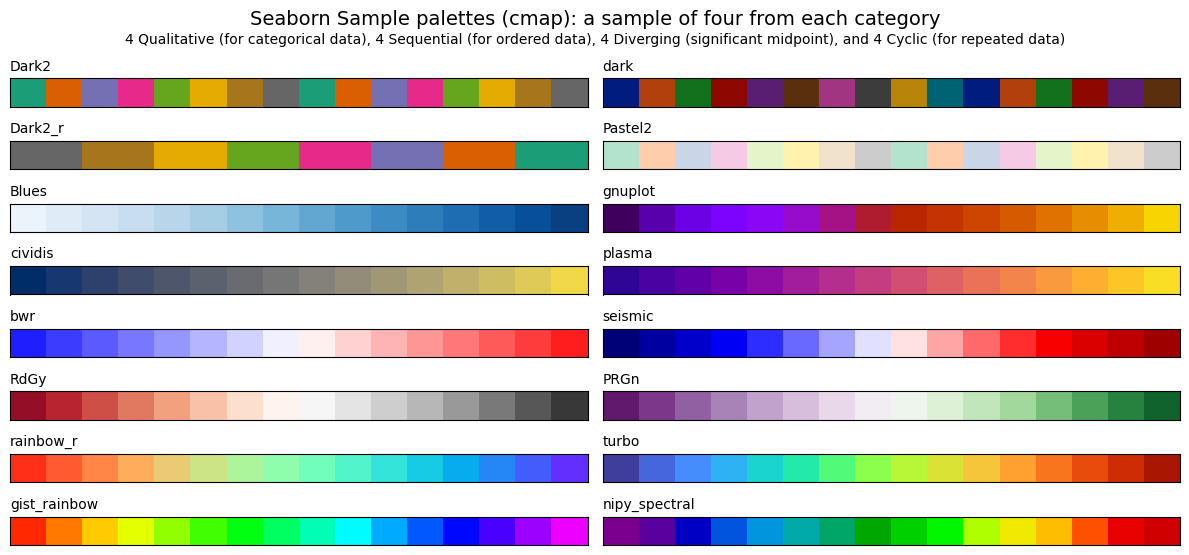

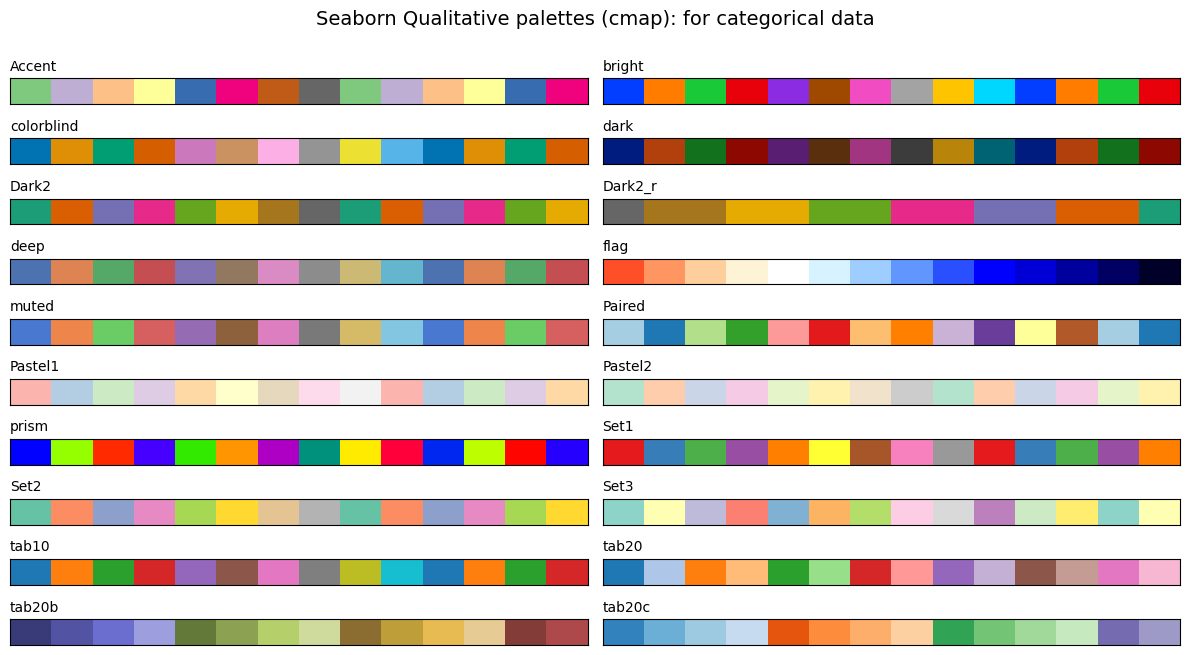

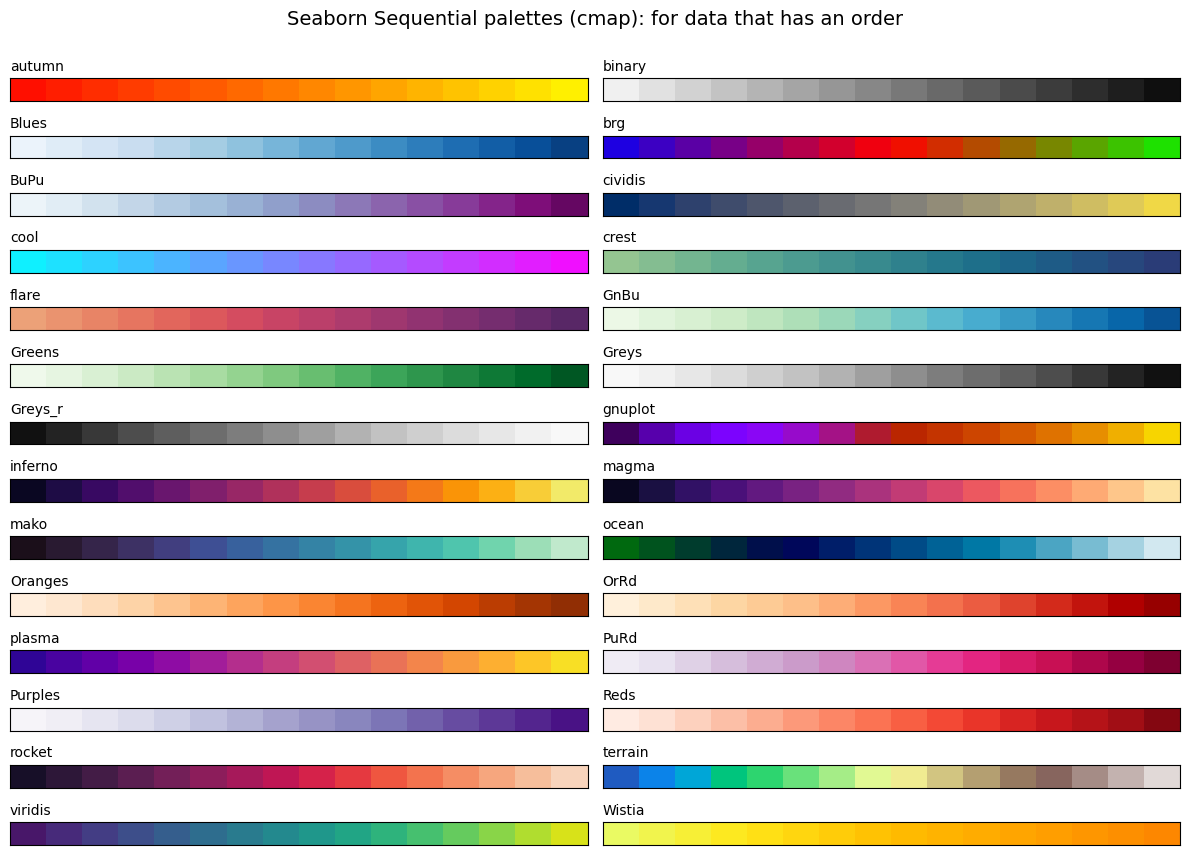

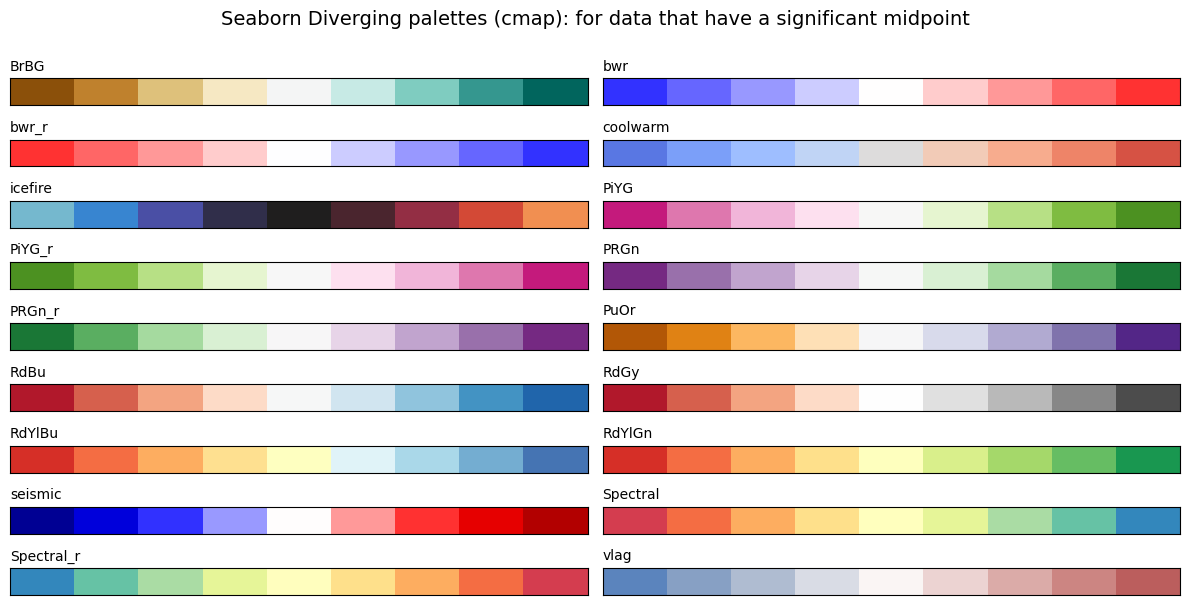

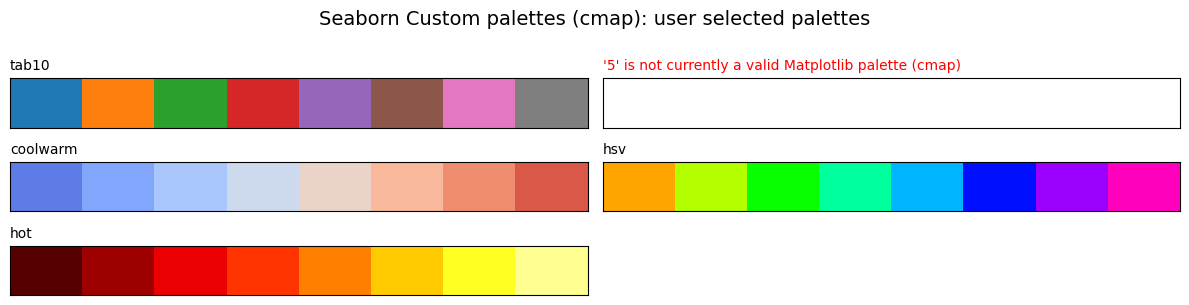

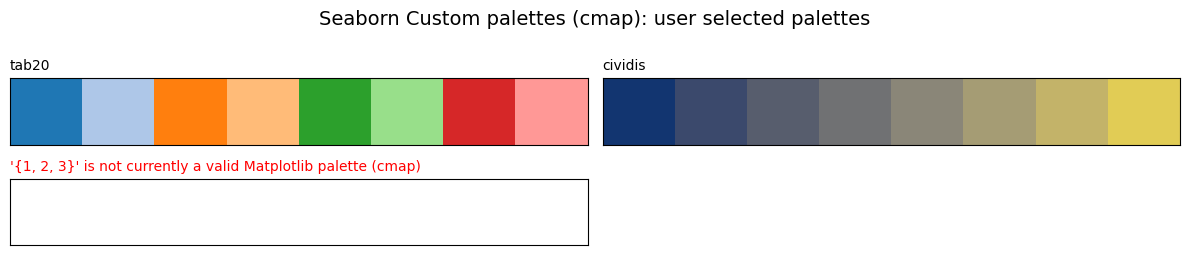

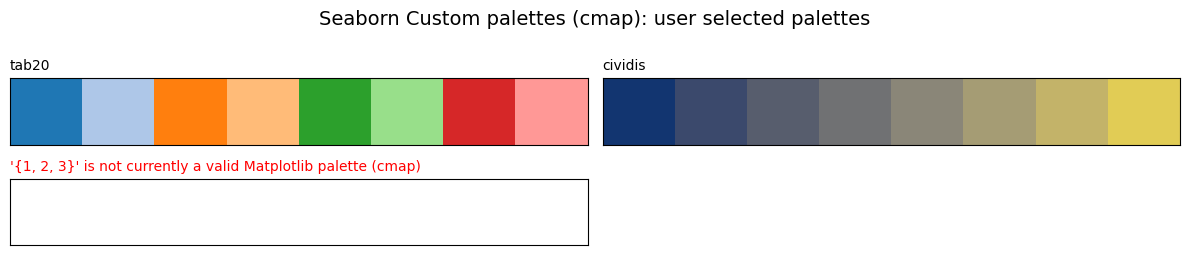

In [9]:
show_sns_palettes(palette_group='Sample', n_items=16)  # Example call to show the palettes
show_sns_palettes(palette_group='Qualitative')  # Example call to show a specific palette group
show_sns_palettes(palette_group='Sequential', n_items=16)  # Example call to show a specific palette group
show_sns_palettes(palette_group='Diverging', n_items=9)  # Example call to show a specific palette group
show_sns_palettes(palette_group=['tab10', 5, 'coolwarm', 'hsv', 'hot'], n_items=8)  # Example call with custom palettes
show_sns_palettes(palette_group=['tab20', 'cividis', {1, 2, 3}], n_items=8)  # Example call with custom palettes

In [7]:
stop()

NameError: name 'stop' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
from typing import Optional, Union

# No necesitamos 'to_series' directamente para la función show_sns_palettes,
# pero la mantengo como una definición dummy si tu entorno la necesita para otros propósitos.
def to_series(data: dict):
    class Series:
        def __init__(self, data):
            self.index = list(data.keys())
            self.values = list(data.values())
        def __getitem__(self, key):
            return self.values[key]
    return Series(data)

# 'get_colors_list' ahora sí usará n_colors
def get_colors_list(palette_name: str, n_colors: int): # Changed n_items to n_colors
    try:
        colors = sns.color_palette(palette_name, n_colors=n_colors) # Changed n_items to n_colors
        return colors
    except ValueError:
        return ['lightgray'] * n_colors # Ensure it returns a list of appropriate length


def show_sns_palettes(
    palette_group: Union[str, list[str]] = 'Sample',
    n_items: Optional[int] = 16,
) -> plt.Figure:
    """
    Displays a visual comparison of Seaborn color palettes in a two-column layout.

    This function creates a grid of bar charts, each showing the color progression of a
    specific Seaborn (or Matplotlib-compatible) colormap. It supports built-in palette groups
    (Qualitative, Sequential, Diverging, Cyclic), a default 'Sample' view, and custom lists of palettes.

    Parameters:
        palette_group (Union[str, list[str]]): Specifies which palettes to display:
            - If str: one of 'Qualitative', 'Sequential', 'Diverging', 'Cyclic', or 'Sample'.
              Case-insensitive; will be capitalized.
            - If list: a custom list of colormap names to display.
            - Default is 'Sample', which shows a representative selection from all groups.
        n_items (int, optional): Number of color swatches (bars) to display per palette.
            Must be between 1 and 25 (inclusive). Default is 16.

    Returns:
        matplotlib.figure.Figure: The generated figure object containing all subplots.
            This allows further customization, saving, or inspection after display.

    Raises:
        TypeError: If `palette_group` is not a string or list of strings, or if `n_items`
            is not a number.
        ValueError: If `n_items` is not in the valid range (1–25).

    Notes:
        - Invalid or deprecated colormap names are handled gracefully and labeled accordingly.
        - The layout adapts to the number of palettes, using two columns for better readability.
        - Uses `seaborn.color_palette` internally for color extraction and `matplotlib.axes.Axes.barh`
          for display.
        - Ideal for exploring and selecting appropriate color schemes for data visualization.

    Example:
        >>> show_sns_palettes('Sequential', n_items=10)
        # Displays 10-color samples for all Sequential palettes.

        >>> show_sns_palettes(['viridis', 'plasma', 'coolwarm', 'rainbow'], n_items=12)
        # Shows a custom comparison of four specific palettes.

        >>> show_sns_palettes()
        # Shows a default sample of 4 palettes from each category.
    """

    # Verified n_items parameter
    if not isinstance(n_items, (int, float)):
        raise TypeError(f"'n_items' parameter not valid. Must be an int or float. Got '{type(n_items)}'.")

    if n_items < 1 or n_items > 25:
        raise ValueError(f"'n_items' parameter not valid. Must be > 1 and < 26. Got '{n_items}'.")
    n_colors = int(n_items) # Use n_colors internally for consistency with seaborn

    # Palette_group selection + custom palette_group and palette_group parameter validation
    Custom = []                                     # Default empty list for custom palettes
    if isinstance(palette_group, str):
        palette_group_key = palette_group.strip().capitalize()
    elif isinstance(palette_group, list):
        # Convert all custom palette names to strings just in case
        Custom = [str(p) for p in palette_group]
        palette_group_key = 'Custom'
    else:
        raise TypeError(f"'palette_group' parameter not valid. Must be a string or a list. Got {type(palette_group)}.")

    # 1. Native palette Group lists (Seaborn often uses these names directly)
    # Algunas paletas son específicas de Seaborn o se manejan mejor por su nombre base.
    Qualitative = ['Accent', 'colorblind', 'Dark2', 'Dark2_r', 'flag', 'Paired', 'Pastel1', 'Pastel2',
                    'prism', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c',
                    'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind']

    Sequential = ['autumn', 'binary', 'Blues', 'brg', 'BuPu', 'cividis', 'cool', 'GnBu',
                    'Greens', 'Greys', 'Greys_r', 'gnuplot', 'inferno', 'magma', 'ocean', 'Oranges',
                    'OrRd', 'plasma', 'PuRd', 'Purples', 'Reds', 'terrain', 'viridis', 'Wistia',
                    'rocket', 'mako', 'flare', 'crest']

    Diverging = ['BrBG', 'bwr', 'bwr_r', 'coolwarm', 'PiYG', 'PiYG_r', 'PRGn', 'PRGn_r',
                    'PuOr', 'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'seismic', 'Spectral', 'Spectral_r',
                    'vlag', 'icefire']

    Cyclic = ['berlin', 'cubehelix', 'cubehelix_r', 'flag_r', 'gist_rainbow', 'hsv', 'jet_r', 'managua',
              'nipy_spectral', 'rainbow', 'rainbow_r', 'twilight', 'twilight_shifted', 'turbo', 'vanimo',
              'twilight_r', 'twilight_shifted_r', 'turbo_r']


    # 2. Get the palette group (and _desc) based on the input string (the one selected by the user)
    palette_group_dic = {
        'Qualitative': (Qualitative, 'for categorical data'),
        'Sequential': (Sequential, 'for data that has an order'),
        'Diverging': (Diverging, 'for data that have a significant midpoint'),
        'Cyclic': (Cyclic, 'for data that repeats, such as angles or phases'),
        'Custom': (Custom, 'user selected palettes'),
    }

    defaults_for_sample = ('Sample', '')
    # Get the list of palettes for the selected group and its description
    selected_palettes, palette_group_desc = palette_group_dic.get(palette_group_key, defaults_for_sample)

    # Adjust the palette_group for the 'Sample' (four from each group) case.
    # Any value different from the main groups
    if palette_group_key not in ('Qualitative', 'Sequential', 'Diverging', 'Cyclic', 'Custom'):
        palette_group_key = 'Sample'
        # Ensure k is not greater than list length for random.sample
        k_val_qual = min(4, len(Qualitative))
        k_val_seq = min(4, len(Sequential))
        k_val_div = min(4, len(Diverging))
        k_val_cyc = min(4, len(Cyclic))
        
        # Use separate random samples to ensure up to 4 distinct palettes from each group
        palette_group = (random.sample(Qualitative, k=k_val_qual) +
                         random.sample(Sequential, k=k_val_seq) +
                         random.sample(Diverging, k=k_val_div) +
                         random.sample(Cyclic, k=k_val_cyc))
    else:
        palette_group = selected_palettes # If not 'Sample' (all others, custom included), use the selected palettes

    # Create a figure with a flexible grid
    num_palettes = len(palette_group)
    cols = 2
    rows = (num_palettes + cols - 1) // cols # Ceiling division

    # Adjust figure size
    fig_width = 12
    # Base height per row for horizontal bars
    fig_height_per_row = 0.5
    # Total height, adding space for titles/supertitles
    fig_height = rows * fig_height_per_row + 1.5

    fig, axs = plt.subplots(rows, cols, figsize=(fig_width, fig_height), layout='tight')
    axs = axs.flatten() # Flatten the array of axes for easy iteration

    # Set the figure title with the palette group key and description
    fig.suptitle(f"Seaborn {palette_group_key} palettes (cmap): {palette_group_desc}",
                 fontsize=14, fontweight='medium', y=0.98) # Adjust y for suptitle

    if palette_group_key == 'Sample':
        fig.text(0.5, 0.93, "A sample of 4 from each category: Qualitative (categorical), Sequential (ordered), "
                            "Diverging (significant midpoint), and Cyclic (repeated data)",
                 fontsize=10, ha='center', transform=fig.transFigure)

    # Iterate over the axes and palette group to plot each palette
    for i, pltt in enumerate(palette_group):
        ax = axs[i]
        try:
            # Use sns.color_palette to get the colors
            colors = sns.color_palette(pltt, n_colors=n_colors)
            # Manually draw horizontal bars
            for j, color in enumerate(colors):
                ax.barh(0, 1, left=j, color=color, height=1, edgecolor='none')
            ax.set_xlim(0, n_colors)
            ax.set_ylim(-0.5, 0.5) # Center the bar vertically
            ax.set_title(pltt, loc='left', fontsize=10, fontweight='medium')
        except ValueError:
            # Handle invalid palette names
            ax.set_title(f"'{pltt}' (invalid cmap)", loc='left', fontsize=10, fontweight='medium', color='red')
            # # Draw a light gray bar for invalid palettes
            # invalid_colors = sns.color_palette("Grays", n_colors=n_colors)
            # for j, color in enumerate(invalid_colors):
            #     ax.barh(0, 1, left=j, color=color, height=1, edgecolor='none', alpha=0.2)
            # ax.set_xlim(0, n_colors)
            # ax.set_ylim(-0.5, 0.5)

        ax.set_yticks([]) # Hide y-ticks
        ax.set_xticks([]) # Hide x-ticks

    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()
    return fig

# Ejemplo de uso:
if __name__ == '__main__':
    show_sns_palettes(palette_group='Qualitative', n_items=25)  # Example call to show the palettes
    show_sns_palettes(palette_group='Sequential', n_items=10)
    show_sns_palettes(palette_group=['viridis', 'plma', 'coolwarm'], n_items=12)

In [ ]:
fig = show_sns_palettes(palette_group=['viridis', 'hot', 'Blues', 'colorblind', 'Oranges'])

In [ ]:
stop()